## Reading file

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('fashion-mnist_train.csv')

## Pre-processing data

In [2]:
## Seperating the independent and dependent variables
Features=df.loc[:, df.columns != 'label'] # It will contains all columns except our target column
Target=df.loc[:, df.columns == 'label'] #It will contain target column

In [3]:
print("Shape of features vector", Features.shape)
print("Shape of Target vector", Target.shape)

Shape of features vector (60000, 784)
Shape of Target vector (60000, 1)


In [4]:
## Since shape of our Features is 60000*784 , but our model expects input in the shape of 60000*28*28*1, so we will
## reshape it accordingly

In [5]:

X=[]
for i in Features.values: ## Iterating each row
    i=np.array(i)
    X.append(i.reshape(28,28)) ## Reshaping it and storing it in an array
X=np.array(X) ## Making it a numpy array
X = X.reshape((X.shape[0], 28, 28, 1)) 
y=Target.values.reshape(-1) ## Reshaping Y-label

In [6]:
## Now we will normalise the data and convert the Y-labels to one hot encoded form.

In [7]:
# scale data to the range of [0, 1]
X = X.astype("float32") / 255.0

In [8]:
from keras.utils import np_utils

# one-hot encode the training and testing labels
Y = np_utils.to_categorical(y, 10)

Using TensorFlow backend.


## Splitting data

In [12]:
## Splitting the data
from sklearn.model_selection import train_test_split
## We are only using 5% data as test set, so that the our model has more data to learn
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59999, 28, 28, 1), (59999, 10), (1, 28, 28, 1), (1, 10))

## Building Model

In [13]:
# import the necessary packages
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
#from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np



In [14]:
class CNN:
    @staticmethod
    def build(width, height, depth, classes):
        inputShape = (height, width, depth)
        chanDim = -1

        model = Sequential()

        # first CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        
        # second CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        # return the constructed network architecture
        return model


## Training the model

In [15]:
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 32
INIT_LR = 1e-2
BS = 32 

In [16]:

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = CNN.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# train the network
print("[INFO] training model...")
H = model.fit(X_train, y_train,
    batch_size=BS, epochs=NUM_EPOCHS)

[INFO] compiling model...
[INFO] training model...
Epoch 1/32
59999/59999 [==============================] - 156s 3ms/step - loss: 0.5479 - accuracy: 0.8166
Epoch 2/32
59999/59999 [==============================] - 155s 3ms/step - loss: 0.3419 - accuracy: 0.8791
Epoch 3/32
59999/59999 [==============================] - 156s 3ms/step - loss: 0.2960 - accuracy: 0.8948
Epoch 4/32
59999/59999 [==============================] - 156s 3ms/step - loss: 0.2706 - accuracy: 0.9033
Epoch 5/32
59999/59999 [==============================] - 158s 3ms/step - loss: 0.2500 - accuracy: 0.9093
Epoch 6/32
59999/59999 [==============================] - 157s 3ms/step - loss: 0.2404 - accuracy: 0.9128
Epoch 7/32
59999/59999 [==============================] - 162s 3ms/step - loss: 0.2284 - accuracy: 0.9165
Epoch 8/32
59999/59999 [==============================] - 161s 3ms/step - loss: 0.2210 - accuracy: 0.91890s - loss: 0.2210 - accuracy: 0.91
Epoch 9/32
59999/59999 [==============================] - 171s 3ms/

## Plotting the accuracy and loss curves

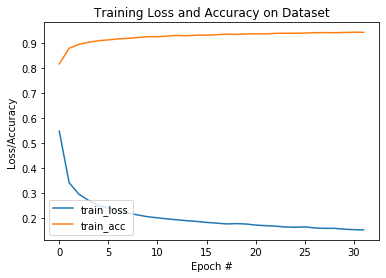

In [21]:
%matplotlib inline
# plot the training loss and accuracy
N = 32
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()


## Testing the model on test set

In [22]:
testdf=pd.read_csv("fashion-mnist_test.csv")
Features=testdf

In [23]:
X=[]
for i in Features.values: ## Iterating each row
    i=np.array(i)
    X.append(i.reshape(28,28)) ## Reshaping it and storing it in an array
X=np.array(X) ## Making it a numpy array
X = X.reshape((X.shape[0], 28, 28, 1)) 


In [24]:
# scale data to the range of [0, 1]
X = X.astype("float32") / 255.0

In [25]:
predictions=model.predict_classes(X)

## Storing the predictions in submission file

In [26]:
submissiondf= pd.read_csv("sample_submission.csv")

In [27]:
submissiondf["predicted"]=predictions

In [28]:
submissiondf.to_csv("MyFSubmission.csv",index=False)